### 1.ndarray 성능확인


In [ ]:
# [0] numpy 라이브러리 import
import numpy as np

In [ ]:
# [1] numpy Vectorizing 연산 원리 - Python with Loop
A = [1, 2, 3]
B = [4, 5, 6]
C = []
for a, b in zip(A, B):
    C.append(a + b)

print(C)

[5, 7, 9]


In [ ]:
# [2] numpy Vectorizing 연산 원리 - Python with Numpy
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
C = A + B
print(C)

[5 7 9]


In [ ]:
# [3] numpy와 list의 성능 차이 확인을 위한 함수 작성
# a 1000000 행, 4 열 - list
a = [[ 1, 2, 3, 4 ] for _ in range(1000000)]  
b = np.array(a) # ndarray

def exchange_list(a):
  c = []
  for x in a:
      x[2], x[3], x[0], x[1] = x
      c.append(x)
  return c

def exchange_ndarray(a):
   return a[ : ,[2, 3, 0, 1]]

In [ ]:
# [4] a, b 배열의 확인
print(a[:2], b[:2], sep='\n')

[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]
[[1 2 3 4]
 [1 2 3 4]]


In [ ]:
# [5] numpy와 list의 성능 차이 확인을 위한 함수 실행
c = exchange_list(a)
d = exchange_ndarray(b)
print(c[:2], d[:2], sep='\n')  

[[3, 4, 1, 2], [3, 4, 1, 2]]
[[3 4 1 2]
 [3 4 1 2]]


In [ ]:
# [6] list를 사용했을 때의 성능 확인
%timeit exchange_list(a)

177 ms ± 4.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# [7] numpy 배열을 사용했을 때의 성능 확인
%timeit exchange_ndarray(b) 

9.1 ms ± 96.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 2.ndarray 속성

In [ ]:
import numpy as np

In [ ]:
# [8] ndarray의 속성 살펴보기
# axis : 축 
a = np.array([1, 2, 3, 4])
b = np.array([[1, 2, 3, 4]])
c = np.array([[[1,2,3,4]]])
print(a.ndim, a.shape)
print(b.ndim, b.shape)
print(c.ndim, c.shape)

1 (4,)
2 (1, 4)
3 (1, 1, 4)


In [ ]:
# [9-1] 데이터에 비해 준비한 메모리가 작다
a = np.array([178,216,128,427,500], dtype=np.int8 )  
print(a.ndim, a.shape, a.dtype)
print(a)

# [9-2] 데이터에 크기에 맞춘 메모리 사용
a = np.array([178,216,128,427,500], dtype=np.int16 )  
print(a.ndim, a.shape, a.dtype)
print(a)

1 (5,) int8
[ -78  -40 -128  -85  -12]
1 (5,) int16
[178 216 128 427 500]


In [ ]:
# [10] print array information
def printInfo(a):
    data = ['a.ndim', 'a.shape', 'a.size', 'a.dtype', 'a.itemsize', 'a.strides']
    for x in data:
        print('%-11s' % x, eval(x))

a = np.array([[0,1,2],[3,4,5]], dtype=np.int32)
#printInfo(a)

print(a.ndim, a.shape, a.size, a.dtype, 
      a.itemsize, a.strides, sep = ' / ')

print(a[1][1])  #  base address + strides[0] * 1 + strides[1] * 1
#print(a.ndim, a.shape, a.size, a.dtype, a.itemsize, a.strides)

2 / (2, 3) / 6 / int32 / 4 / (12, 4)


### 3.ndarray 생성

In [ ]:
import numpy as np

In [ ]:
def printary(*a):
    for x in a:
        print(f'{type(x)}\n{x.dtype}\n{x}', end='\n\n')
            
    print("-" * 30)

##### 1) np.array 사용

In [ ]:
# [11] np.array(object : array_like, dtype=None)
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3], [4, 5, 6]])
c = np.array([[1, 2, 3], [4, 5]])  # array_like가 아님
printary(a, b, c)
print(c.shape, c.itemsize)

d = np.array(10)  # 스칼라
printary(d)
print(d.shape, d.ndim)

<class 'numpy.ndarray'>
int64
[1 2 3]

<class 'numpy.ndarray'>
int64
[[1 2 3]
 [4 5 6]]

<class 'numpy.ndarray'>
object
[list([1, 2, 3]) list([4, 5])]

------------------------------
(2,) 8
<class 'numpy.ndarray'>
int64
10

------------------------------
() 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [ ]:
# [12] Structured Array
sdtype = [('name', '<U10'), ('height', '<i4'), ('weight', np.float32)]
value =  [('Tom', 178, 98.5), ('Jim', 183, 79.5), ('Adam',  175, 82.8)]
    
a = np.array(value, dtype=sdtype)

printary(a)
a

<class 'numpy.ndarray'>
[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')]
[('Tom', 178, 98.5) ('Jim', 183, 79.5) ('Adam', 175, 82.8)]

------------------------------


array([('Tom', 178, 98.5), ('Jim', 183, 79.5), ('Adam', 175, 82.8)],
      dtype=[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')])

In [ ]:
# [13] Structured Array의 출력
printary(a['name'], a['height'], a['weight'])
printary(a[0], a[1], a[2])
print(a.shape, a.strides, a[0])   # a.strides - 1개 row에 해당하는 메모리 크기

<class 'numpy.ndarray'>
<U10
['Tom' 'Jim' 'Adam']

<class 'numpy.ndarray'>
int32
[178 183 175]

<class 'numpy.ndarray'>
float32
[98.5 79.5 82.8]

------------------------------
<class 'numpy.void'>
[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')]
('Tom', 178, 98.5)

<class 'numpy.void'>
[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')]
('Jim', 183, 79.5)

<class 'numpy.void'>
[('name', '<U10'), ('height', '<i4'), ('weight', '<f4')]
('Adam', 175, 82.8)

------------------------------
(3,) (48,) ('Tom', 178, 98.5)


##### 2) np.arange 사용

In [ ]:
# [14] np.arange의 사용 
# np.arange(stop:number, dtype=None)
# np.arange(start, stop)
# np.arange(start, stop, step)
a = np.arange(5)
b = np.arange(1, 10, 2)
c = np.arange(1, 2, 0.1) #, dtype=np.float64)
printary(a, b, c)

<class 'numpy.ndarray'>
int32
[0 1 2 3 4]

<class 'numpy.ndarray'>
int32
[1 3 5 7 9]

<class 'numpy.ndarray'>
float64
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]

------------------------------


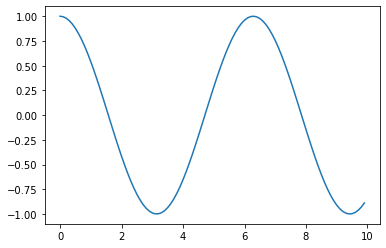

In [ ]:
# [15] 그래프 그릴때 축설정으로 사용 예
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
x = np.arange(0, 10, 0.1)
y = np.cos(x)
plt.plot(x, y)
plt.show()

In [ ]:
# [16] 1개 값도 array_like 이다
x = np.array(1)
print(x, type(x))

1 <class 'numpy.ndarray'>


##### 3) np.linspace 사용

In [ ]:
a, step = np.linspace(0, 9, 10, retstep=True)
print(a, step)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] 1.0


In [ ]:
# [17] np.linspace(start:array_like, stop, num=50, endpoint=True, retstep=False, dtype=None)
a = np.linspace(1, 10)
b = np.linspace(1, 5, 10, endpoint=False)
c = np.linspace(1, 5, 9, retstep=True)
print(a, b, c, sep="\n")

[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]
[1.  1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6]
(array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]), 0.5)


In [ ]:
# [18] 두 개의 list를 사용한 경우 (2차원)
x = np.linspace([1, 2, 3], [2, 4, 6], num=5)
print(x)

[[1.   2.   3.  ]
 [1.25 2.5  3.75]
 [1.5  3.   4.5 ]
 [1.75 3.5  5.25]
 [2.   4.   6.  ]]


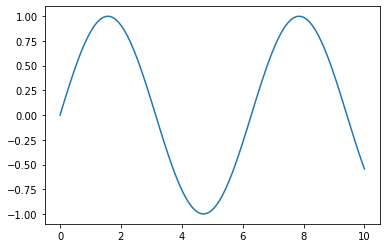

In [ ]:
# [19] 그래프 그릴때 축설정으로 사용 예
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

##### 4) random 사용

In [ ]:
# [20] 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# [21] numpy 출력 옵션 조절
np.set_printoptions(threshold=999,
                    suppress=True,
                    precision=4,
                    edgeitems=3)

In [ ]:
# [22]배열 출력 함수
def printary(*a):
    for x in a :
        print(f"shape : {x.shape}")
        print(f"array : %s{x} " % ('' if x.ndim == 1 else '\n'))
        print("mean  : %.3f, std : %.3f" % (x.mean(), x.std()))
        print("-" * 30)

In [ ]:
# [23] 히스토그램 그리기
def showHist(x):
    plt.hist(x)
    plt.show()

In [ ]:
c = np.random.rand(3,4)
printary(c)

shape : (3, 4)
array : 
[[0.0904 0.1191 0.8107 0.4544]
 [0.1412 0.542  0.5955 0.0461]
 [0.9397 0.5967 0.0709 0.0865]] 
mean  : 0.374, std : 0.306
------------------------------


In [ ]:
# [24] np.random.rand(d0, d1, ...,dn)  
# 0~1 사이의 균일 분포로 실수 난수 배열 생성
# d0, d1, ..., dn : 배열의 shape을 의미하는 정수
a = np.random.rand(5)
b = np.random.rand(2, 2, 3)
printary(a, b)

shape : (5,)
array : [0.6548 0.0505 0.5631 0.9042 0.5751] 
mean  : 0.550, std : 0.278
------------------------------
shape : (2, 2, 3)
array : 
[[[0.0131 0.8187 0.2491]
  [0.0658 0.069  0.4525]]

 [[0.7872 0.7294 0.8389]
  [0.5245 0.5778 0.1382]]] 
mean  : 0.439, std : 0.306
------------------------------


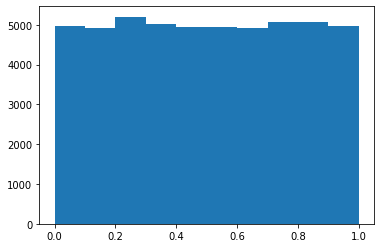

In [ ]:
# [25] 히스토그램으로 분포 확인
showHist(np.random.rand(50000))

In [ ]:
# [26] np.random.randint(e, size=n)
# np.random.randint(s, e, size=n)
# 0~e-1, s~e-1 범위의 값을 갖는 균일 분포의 정수 난수 생성
# size : 정수(1차원), tuple(1차원 이상)로 shape 지정
a = np.random.randint(10, size=(5,))
b = np.random.randint(50, 100, (2,4)) 
printary(a, b)

shape : (5,)
array : [7 1 4 9 4] 
mean  : 5.000, std : 2.757
------------------------------
shape : (2, 4)
array : 
[[59 92 56 77]
 [91 67 58 64]] 
mean  : 70.500, std : 13.592
------------------------------


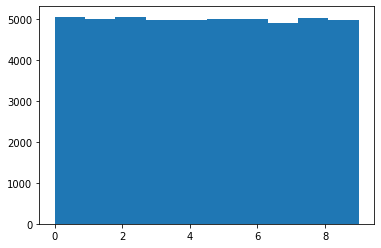

In [ ]:
# [27] 히스토그램으로 분포 확인
showHist(np.random.randint(10, size=50000))

In [ ]:
# [28] np.random.randn(d0, d1, ... dn)
# 평균 0, 표준편차 1을 갖는 가우시안 표준 정규 분포로 난수 배열 생성(음수 포함)
a = np.random.randn(5)
b = np.random.randn(200, 50)
printary(a, b)

shape : (5,)
array : [ 0.0887  0.4696  0.2496  0.0511 -0.6025] 
mean  : 0.051, std : 0.359
------------------------------
shape : (200, 50)
array : 
[[-0.3758  0.1685 -1.5191 ...  1.2369  0.0547  0.3518]
 [ 0.0313 -0.5622 -0.4562 ...  0.5118  0.7811  0.512 ]
 [ 0.2184 -1.4841  0.1861 ... -1.3295 -0.2064 -0.3841]
 ...
 [ 1.5983  1.4777  1.1309 ... -0.9259  0.4862  0.7126]
 [-0.4622 -0.9972 -1.828  ...  1.212   1.6168  0.3936]
 [-0.0172  0.9921 -1.3381 ...  0.4823  0.2638 -0.3589]] 
mean  : -0.009, std : 1.004
------------------------------


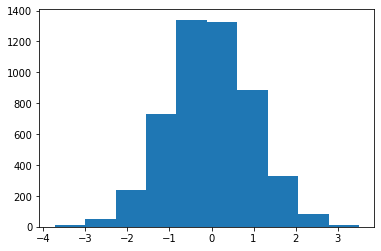

In [ ]:
# [29] 히스토그램으로 분포 확인
showHist(np.random.randn(5000))

In [ ]:
# [30] np.random.normal(평균, 표준편차, size)
# 생략하면 평균=0, 표준편차=1, size=1이 됨
a = np.random.normal(2, 3, size=(100, 20))
printary(a)

shape : (100, 20)
array : 
[[ 1.2302  2.7856  2.3337 ...  3.8996  0.5011  3.8689]
 [ 5.5603  3.5701  1.0856 ...  1.5501  0.3365  1.6964]
 [ 1.135   5.6397 -2.9284 ...  4.0152  0.6782  2.6751]
 ...
 [ 4.5993 -0.6375  1.7863 ...  2.916   5.4227  2.9234]
 [ 1.3871 -1.2488 -0.2873 ...  2.2529 -1.0578  8.2177]
 [-0.1729  7.3256  0.1645 ... -2.946   3.1968  2.0968]] 
mean  : 1.916, std : 2.941
------------------------------


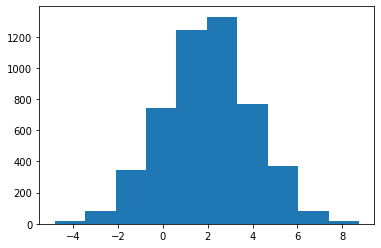

In [ ]:
# [31] 히스토그램으로 분포 확인
showHist(np.random.normal(2, 2, (5000,)))

In [ ]:
# [32] permutation 사용 배열 생성
#np.random.permutation(e) : 0 ~ e-1 값을 갖는 정수의 무작위 순서 1차원 배열 생성
#np.random.permutation(c) : c 요소들에 대해 무작위 순서로 변경된 1차원 배열 생성
# e : 정수, c : array_like 객체
a = np.random.permutation(10)
data = np.array([1,3,4,5,3,1,3])
b = np.random.permutation(data)
mylist = [[1,2,3],[4,5,6],[7,8,9],[3,2,1]]
c = np.random.permutation(mylist)
printary(a, b, c)

shape : (10,)
array : [3 2 4 7 1 5 9 6 0 8] 
mean  : 4.500, std : 2.872
------------------------------
shape : (7,)
array : [3 1 3 4 5 1 3] 
mean  : 2.857, std : 1.355
------------------------------
shape : (4, 3)
array : 
[[7 8 9]
 [3 2 1]
 [4 5 6]
 [1 2 3]] 
mean  : 4.250, std : 2.618
------------------------------


##### 5) 특정값으로 채워진 ndarray생성

In [ ]:
import numpy as np

In [ ]:
def printary(*a):
    for x in a:
        print(f'{x.dtype}\n{x}')
    print("-" * 30)

In [ ]:
mshape = (2, 3)  

In [ ]:
# [33] np.zeros(shape, dtype=float64)
#shape: 정수(1차원), tuple(1차원 이상)
a = np.zeros(10, dtype = np.int32)
b = np.zeros(mshape)
printary(a, b)

int32
[0 0 0 0 0 0 0 0 0 0]
float64
[[0. 0. 0.]
 [0. 0. 0.]]
------------------------------


In [ ]:
# [34] np.empty(shape, dtype=float64)
a = np.empty(10, dtype=np.int32)
b = np.empty(mshape)
printary(a, b)

int32
[0 0 0 0 0 0 0 0 0 0]
float64
[[0. 0. 0.]
 [0. 0. 0.]]
------------------------------


In [ ]:
# [35] np.ones, np.full
#np.ones(shape,dtype=float64)
#np.full(shape, value, dtype=None)
a = np.ones(mshape)
b = np.full(mshape, 5.0)
printary(a, b)

float64
[[1. 1. 1.]
 [1. 1. 1.]]
float64
[[5. 5. 5.]
 [5. 5. 5.]]
------------------------------


In [ ]:
# [36] np.eye(N, M=None, k=0, dtype=float64)
a = np.eye(3)
b = np.eye(3, 5, 2)
c = np.eye(3, 5, -1)
printary(a, b, c)

float64
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
float64
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
float64
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
------------------------------


In [ ]:
# [37] np.zeros_like(array_like, dtype=None)
x = np.array([[1,2,3],[4,5,6]])
a = np.zeros_like(x, dtype = np.float64)
b = np.empty_like(x)
printary(a, b)

float64
[[0. 0. 0.]
 [0. 0. 0.]]
int32
[[0 0 0]
 [0 0 0]]
------------------------------


In [ ]:
# [38] np.ones_like, np.full)life
a = np.ones_like([[1,2,3],[4,5,6]], dtype=np.float32)
b = np.full_like(np.arange(5), 5)
printary(a, b)

float32
[[1. 1. 1.]
 [1. 1. 1.]]
int32
[5 5 5 5 5]
------------------------------


### 4.view vs copy

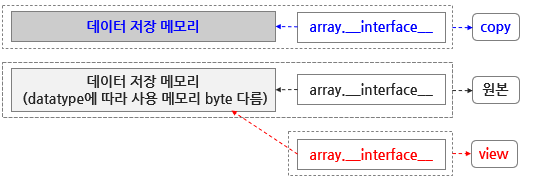

In [ ]:
# [39] view vs copy 
arr = np.array([1, 3, 5, 7, 9], dtype = np.int32)
brr = arr[2:]   # view
crr = arr.copy()# copy
print( arr.__array_interface__['data'][0] )
print( brr.__array_interface__['data'][0] )
print( crr.__array_interface__['data'][0] )
print(arr, brr, crr)
brr[0] = 100
crr[0] = 200
print(arr, brr, crr)
arr[3] = 55
print(arr, brr, crr)


1949286618992
1949286619000
1949286618032
[1 3 5 7 9] [5 7 9] [1 3 5 7 9]
[  1   3 100   7   9] [100   7   9] [200   3   5   7   9]
[  1   3 100  55   9] [100  55   9] [200   3   5   7   9]


In [ ]:
def npinfo(n, a, x):
    print("name    :", n)    
    print("share   :", np.may_share_memory(a, x) )
    print("data    :", x.tolist())    
    print("ndim    :", x.ndim)
    print("shape   :", x.shape)
    print("dtype   :", x.dtype)
    print("-" * 30)

In [ ]:
# [40-1] copy
a = np.array([[True, True], [False, False]], dtype=np.bool)
b = a.copy()
b[0, 0] = False  # 0 also can use
npinfo("original", a, a)
npinfo("copy", a, b)

name    : original
share   : True
data    : [[True, True], [False, False]]
ndim    : 2
shape   : (2, 2)
dtype   : bool
------------------------------
name    : copy
share   : False
data    : [[False, True], [False, False]]
ndim    : 2
shape   : (2, 2)
dtype   : bool
------------------------------


In [ ]:
# [40-2] view
a = np.array([[True, True], [False, False]], dtype=np.bool)
b = a.view(np.bool)
b[0, 0] = 0
npinfo("original", a, a)
npinfo("view", a, b)  

name    : original
share   : True
data    : [[False, True], [False, False]]
ndim    : 2
shape   : (2, 2)
dtype   : bool
------------------------------
name    : view
share   : True
data    : [[False, True], [False, False]]
ndim    : 2
shape   : (2, 2)
dtype   : bool
------------------------------


### 5.ndarray 변환 (reshape, flatten)

In [ ]:
import sys
def npinfo(n, a, x):
    print("name   :", n)
    print("share  :", np.may_share_memory(a, x))
    print("data   :", x.tolist())  
    print("shape  :", x.shape)
    print("dtype  :", x.dtype)
    print("stride :", x.strides)
    print("addr   :", x.__array_interface__['data'][0])    
    print("sizeof :", sys.getsizeof(x))
    print("-" * 30)

In [ ]:
# [41] np.reshape, arr.reshape 
# np.reshape(a, newshape: int or tuple or ints, order='C')
# arr.reshape(newshape: int or tuple or ints, order='C')
a = np.array([[1,2,3],[4,5,6]])
b = a.reshape(1, -1)
npinfo("a.reshape(1, -1)", a, b)

name   : a.reshape(1, -1)
share  : True
data   : [[1, 2, 3, 4, 5, 6]]
shape  : (1, 6)
dtype  : int32
stride : (24, 4)
addr   : 1949301965248
sizeof : 112
------------------------------


In [ ]:
# [42-1] ndarray.reshape
b = a.reshape(-1)
npinfo("a.reshape(-1)", a, b)
#a.tolist(), b.tolist()

name   : a.reshape(-1)
share  : True
data   : [1, 2, 3, 4, 5, 6]
shape  : (6,)
dtype  : int32
stride : (4,)
addr   : 1949301965248
sizeof : 96
------------------------------


In [ ]:
# [42-2] ndarray.reshape
b = a.reshape(-1, 1)
npinfo("a.reshape(-1, 1)", a, b)

name   : a.reshape(-1, 1)
share  : True
data   : [[1], [2], [3], [4], [5], [6]]
shape  : (6, 1)
dtype  : int32
stride : (4, 4)
addr   : 1949301965248
sizeof : 112
------------------------------


In [ ]:
# ndarray.reshape - copy()
b = a.reshape(3, -1).copy()
npinfo('b', a, b)

name   : b
share  : False
data   : [[1, 2], [3, 4], [5, 6]]
shape  : (3, 2)
dtype  : int32
stride : (8, 4)
addr   : 1949286619760
sizeof : 136
------------------------------


In [ ]:
# [42-3] ndarray.rshape
b = a.reshape(-1, 1, order='F')
npinfo("a.reshape(-1, 1, order='F')", a, b)

name   : a.reshape(-1, 1, order='F')
share  : False
data   : [[1], [4], [2], [5], [3], [6]]
shape  : (6, 1)
dtype  : int32
stride : (4, 24)
addr   : 1949301965088
sizeof : 112
------------------------------


In [ ]:
# [43-1] ndarray.flatten
a = np.array([[1,2,3], [4, 5, 6]], dtype=np.int32)
print(a)

[[1 2 3]
 [4 5 6]]


In [ ]:
# [43-2] ndarray.flatten
b = a.flatten()
b[0] = 100
npinfo("a.flatten()", a, b)
a.tolist(), b.tolist()

name   : a.flatten()
share  : False
data   : [100, 2, 3, 4, 5, 6]
shape  : (6,)
dtype  : int32
stride : (4,)
addr   : 1949301965248
sizeof : 120
------------------------------


([[1, 2, 3], [4, 5, 6]], [100, 2, 3, 4, 5, 6])

In [ ]:
# [44] ndarray.astype
a = np.array([[1,2,0],[4,0,6]])
b = a.astype(np.bool)
npinfo("a.astype(np.int32)", a, b)

name   : a.astype(np.int32)
share  : False
data   : [[True, True, False], [True, False, True]]
shape  : (2, 3)
dtype  : bool
stride : (3, 1)
addr   : 1949286430640
sizeof : 118
------------------------------


### 6.ndarray의 연산

#### 1) ndarray 산술연산

In [ ]:
import numpy as np

In [ ]:
# [45] ndarray연산
# element-wise 방식으로 연산이 이루어짐
# 연산대상인 두 배열의 shape이 동일해야 한다
a = np.array( range(1, 7) )
b = np.array( range(7, 13) )
print('a =', a.tolist())
print('b =', b.tolist())
print('a +  b =', a + b)
print('b -  a =', b - a)
print('a *  b =', a * b)
print('b /  a =', b / a)
print('b // a =', b // a)
print('b %  a =', b % a)
print('a +  2 =', a + 2)
print('b -  1 =', b - 1)

a = [1, 2, 3, 4, 5, 6]
b = [7, 8, 9, 10, 11, 12]
a +  b = [ 8 10 12 14 16 18]
b -  a = [6 6 6 6 6 6]
a *  b = [ 7 16 27 40 55 72]
b /  a = [7.  4.  3.  2.5 2.2 2. ]
b // a = [7 4 3 2 2 2]
b %  a = [0 0 0 2 1 0]
a +  2 = [3 4 5 6 7 8]
b -  1 = [ 6  7  8  9 10 11]


In [ ]:
# [46] tolist()를 사용하여 list로 변환
a = np.array(range(1, 7)).reshape(2,3)
b = np.array(range(7, 13)).reshape(2,3)
print(a)
print(type(a.tolist()))
print('a =', a.tolist())
print('b =', b.tolist())
print('a + b =', (a + b).tolist())
print('a * b =', (a * b).tolist())

[[1 2 3]
 [4 5 6]]
<class 'list'>
a = [[1, 2, 3], [4, 5, 6]]
b = [[7, 8, 9], [10, 11, 12]]
a + b = [[8, 10, 12], [14, 16, 18]]
a * b = [[7, 16, 27], [40, 55, 72]]


In [ ]:
# [47] element-wise 성립하지 않음 (broadcasting안됨)
a = np.array( [1, 3, 5] )
c = np.array( [7, 9] )
print('a + c =', a + c)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

#### 2) ndarray broadcasting
- broadcasting 이란?
- element-wise가 성립하지 않는 경우 두 배열의 크기를 동일하게 만들어 연산가능하도록 하는 것  


In [ ]:
def printary(m, *a):
    print(m)
    for x in a:
        print(x.shape)
        print(x.tolist())

In [ ]:
# [48-1] 배열 생성
a=np.array([[1, 1, 1], [1, 1, 1]])
b=np.array([[1, 1, 1], [2, 2, 2]])
c=np.array([[1],[2],[3]])
d=np.array([3, 3, 3])
print(a.shape, b.shape, c.shape, d.shape)

(2, 3) (2, 3) (3, 1) (3,)


In [ ]:
# [48-2] a + b
printary("a+b", a, b, a+b)

a+b
(2, 3)
[[1, 1, 1], [1, 1, 1]]
(2, 3)
[[1, 1, 1], [2, 2, 2]]
(2, 3)
[[2, 2, 2], [3, 3, 3]]


In [ ]:
printary("a+c", a, c, a+c)

ValueError: operands could not be broadcast together with shapes (2,3) (3,1) 

In [ ]:
# [48-3] a + d
printary("a+d", a, d, a+d)

a+d
(2, 3)
[[1, 1, 1], [1, 1, 1]]
(3,)
[3, 3, 3]
(2, 3)
[[4, 4, 4], [4, 4, 4]]


In [ ]:
# [48-4] b + 4
printary("b+4", b, b+4)

b+4
(2, 3)
[[1, 1, 1], [2, 2, 2]]
(2, 3)
[[5, 5, 5], [6, 6, 6]]


In [ ]:
# [48-5] c + d
printary("c+d", c, d, c+d)

c+d
(3, 1)
[[1], [2], [3]]
(3,)
[3, 3, 3]
(3, 3)
[[4, 4, 4], [5, 5, 5], [6, 6, 6]]


#### 3) ndarray 비교연산
- ==, !=, >, <, >=, <= : 결과 True/False
- element-wise 방식 (필요시 broadcasting)

#### 4) 다음의 연산 결과의 shape을 예측해 보세요!

In [ ]:
# [49-1] broadcasting 연산
import numpy as np
a = np.array([[1],[2],[3],[4],[5]])  # (5, 1)
b = np.array([1, 2, 3])              # (3,)
c = a + b
print(a.shape, b.shape, c.shape)

(5, 1) (3,) (5, 3)


In [ ]:
# [49-2] broadcasting 연산
print(a)
print(b)
print(c)

[[1]
 [2]
 [3]
 [4]
 [5]]
[1 2 3]
[[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]]


In [ ]:
# [50-1] 비교 연산 결과 출력
def printary(*a):
    for x in a:
        print(x.tolist(), end='\n')
        print("-" * 45)

In [ ]:
# [50-2] ==, != 연산
a=np.array([[1, 2, 3], [4, 5, 6]])
b=np.array([[1, 3, 5], [2, 4, 6]])
printary(a==b, a!=b)

[[True, False, False], [False, False, True]]
---------------------------------------------
[[False, True, True], [True, True, False]]
---------------------------------------------


In [ ]:
# [50-3] >, < 연산
a=np.array([[1, 2, 3], [4, 5, 6]])
b=np.array([[1, 3, 5], [2, 4, 6]])
printary(a>b, a<b)

[[False, False, False], [True, True, False]]
---------------------------------------------
[[False, True, True], [False, False, False]]
---------------------------------------------


In [ ]:
# [50-4] >=, <= 연산
a=np.array([[1, 2, 3], [4, 5, 6]])  # (2, 3)
b=np.array([[1, 3, 5], [2, 4, 6]])
c=np.array([4, 3, 3])   # (3,)  # [[4, 3, 3], [4, 3, 3]]
printary(a>=c, b<=3)    #  3    # [[3, 3, 3],[3, 3, 3]]

[[False, False, True], [True, True, True]]
---------------------------------------------
[[True, True, False], [True, False, False]]
---------------------------------------------


### 7.Indexing

#### 1) ndarray indexing 이해
- indexing을 사용하여 배열에서 원하는 데이터를 참조/변경한다
- 배열 이름 뒤에 [ ] 를 사용하여 참조/변경 할 데이터를 표기한다
- 결과는 원본의 view이며, view에 대입을 통해 데이터 변경이 가능함
- ndim >= 2 인 경우 [ ] 내부에 콤마(,)를 사용하여 차원(축, axes, axis)을 구분함
- 콤마(,) 사이에는 참조/변경하기 원하는 데이터에 대한 표기(indexer)가 포함되어야 함
- axis=0을 제외한 차원에 대한 표기 생략가능, 생략은 “모두 선택”의 의미를 갖음
- https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html
- https://www.numpy.org/devdocs/user/basics.indexing.html



In [ ]:
# [51-1] single element indexer의 사용 - 데이터 참조
import numpy as np
a = np.arange(9).reshape(3,3)

print(a)
print(a[1])
print(a[1,:])
print(a[0, 2])
print(a[0][2])

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[3 4 5]
[3 4 5]
2
2


In [ ]:
# [51-2] single element indexer의 사용 - 데이터 변경
a[0,2] = 100
print(a)
a[1][2] = 200
print(a)
a[2] = [10, '20', 3.67]
print(a)

[[  0   1 100]
 [  3   4   5]
 [  6   7   8]]
[[  0   1 100]
 [  3   4 200]
 [  6   7   8]]
[[  0   1 100]
 [  3   4 200]
 [ 10  20   3]]


#### 2) Indexer의 종류
- single element index
- slicing & stride index
- index arrays
- boolean array
- structural indexing tools

In [ ]:
import numpy as np
a = np.arange(24).reshape(3, 2, 4)
a[...], a[...,:]

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],
 
        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],
 
        [[16, 17, 18, 19],
         [20, 21, 22, 23]]]), array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],
 
        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],
 
        [[16, 17, 18, 19],
         [20, 21, 22, 23]]]))

In [ ]:
# [52] indexer의 종류
import numpy as np
a = np.arange(5)

print(a[1], type(a[1]))
print(a[[1]], type(a[[1]]))
print(a[1:4:2])
print(a[[0,1,-1]])
print(a[[True, False, False, True, False]])
print(a[..., np.newaxis])

1 <class 'numpy.int64'>
[1] <class 'numpy.ndarray'>
[1 3]
[0 1 4]
[0 3]
[[0]
 [1]
 [2]
 [3]
 [4]]


#### 3) list와 ndarray의 indexing 차이점
- ndarray의 indexing의 반환 값은 원본을 참조하는 view이다 
- 새로운 ndarray로 처리하려면 copy 함수나 메서드를 사용해야 한다


In [ ]:
# [53-1] list of python
x = [[1, 2, 3], [6, 7, 8]]
z = x[:]  #  [id(x[0])][id(x[1])]
z[0] = [10, 20, 30]
z[1][0] = 100
print(x, z, sep='\n')
#print(id(x[1]), id(z[1]))
print("-"*25)

[[1, 2, 3], [100, 7, 8]]
[[10, 20, 30], [100, 7, 8]]
-------------------------


In [ ]:
# [53-2]ndarray of numpy
x = np.array([[1, 2, 3], [6, 7, 8]])
z = x[1:]
z[0] = [10, 20, 30]
print(x, z, sep='\n')
print(np.may_share_memory(x,z)) 
print(x.__array_interface__['data'][0], z.__array_interface__['data'][0], x.dtype)

[[ 1  2  3]
 [10 20 30]]
[[10 20 30]]
True
1680360629744 1680360629756 int32


#### 4) single element index 사용
- single element index의 사용이 1개 증가 할 때마다 배열의 차원(ndim)은 1씩 감소한다
- axis=0부터 뒤쪽으로 콤마(,)를 기준으로 index를 나열함
- index 표기되지 않은 차원은 “모두 선택”
- 예) 2차원 배열에서 a[n]은 n번 행 전체를 반환 함
- indexing을 연속으로 진행한 것과 콤마(,) 나열은 같은 결과
- 예) a[n][m] == a[n, m]

In [ ]:
# [54] single element index 사용
a = np.arange(12).reshape(2,3,2)
print(a.tolist())
print(a[0].tolist())
print(a[0, 0].tolist())
print(a[0, 0, 0])

[[[0, 1], [2, 3], [4, 5]], [[6, 7], [8, 9], [10, 11]]]
[[0, 1], [2, 3], [4, 5]]
[0, 1]
0


#### 5) slice & stride
- arr[n:m:k]
- n 부터 m-1 까지, k 씩 건너 뛴 위치 요소로 구성된 배열 반환
- n, m, k는 생략 가능하며 생략시 n = 0, m = len(arr), k=1
- slice & stride의 사용이 증가해도 배열의 차원(ndim)은 변화 없음
- axis=0부터 뒤쪽으로 콤마(,)를 기준으로 indexer를 나열함
- indexer가 표기되지 않은 axis는 “모두 선택”
-  :  특정 axis에 대해 모든 범위를 의미함
-  ... 나머지 모든 차원에 대해 모든 범위를 의미함


In [ ]:
a = np.arange(12).reshape(4, 3)
#a[2:] 
#a[ :0:-1, :0:-1]
a[ -1:-4:-1, -1:-3:-1 ]
#a[ ::-1, ::-1][:3, :2]

array([[11, 10],
       [ 8,  7],
       [ 5,  4]])

In [ ]:
a = np.arange(32).reshape(4,2,4)
a[:, :1, 2:].shape

(4, 1, 2)

In [ ]:
# [55] 차원(ndim)의 변화는 없음
a = np.arange(12).reshape(2,3,2)
print(a.tolist())
print(a[1:].tolist())
print(a[..., ::-1].tolist())
print(a[:, ::-1].tolist())

[[[0, 1], [2, 3], [4, 5]], [[6, 7], [8, 9], [10, 11]]]
[[[6, 7], [8, 9], [10, 11]]]
[[[1, 0], [3, 2], [5, 4]], [[7, 6], [9, 8], [11, 10]]]
[[[4, 5], [2, 3], [0, 1]], [[10, 11], [8, 9], [6, 7]]]


In [ ]:
a = np.arange(60).reshape(2,3,2,5)
a[1:,...,3:]

array([[[[33, 34],
         [38, 39]],

        [[43, 44],
         [48, 49]],

        [[53, 54],
         [58, 59]]]])

#### 6) index arrays
- index_array은 dtype=int인 배열로, index 번호를 element로 갖는 배열임
- index_array 의  형태에 따라 반환되는 배열의 ndim이 원본과 동일하거나, 증가, 감소 될 수 있음

##### 1차원
- index_array 에 포함된 index 항목들로 구성된 배열 반환
- a[ [0, 2, 4] ] 는 a에서 0,2,4 번 index 항목으로 구성된 배열 반환
- index_array 사용시 주의 사항
   - index 중복 사용 가능
   - 2차원 이상의 index_array 는 ndarray 를 사용( [[[ -> 사용 불가능)


In [ ]:
# [56-1]index array 사용 
import numpy as np
a = np.arange(5) # [0 1 2 3 4]
print( a[0], a[[0]], type(a[[0]]))
print( a[[-1, 0, 1, 0]])
#print( a[[[0, 2, 4], [1, 3, 3]]])
print( a[np.array([[0, 2, 4], [1, 3, 3]])])


0 [0] <class 'numpy.ndarray'>
[4 0 1 0]
[[0 2 4]
 [1 3 3]]


In [ ]:
import numpy as np
a = np.array([1, 3, 5, 7, 9])
b = a[ np.array([[1, 2],[0, -1]] ) ]
b

array([[3, 5],
       [1, 9]])

In [ ]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
a = np.array([1, 3, 5, 7, 9])
print(a[np.array([[0, 2, 4], [1, 3, 3]])])

[[1 5 9]
 [3 7 7]]


##### 2차원
- idx_a1, idx_a2의 같은 위치 항들이 묶여 위치 정보가 됨
- 다차원이 되면 콤마(,)로 나열하며 동일 길이로 구성되어야 함
- a가 2D array인 경우 
  - a[ [0,0,1],[2,3,1] ] 은 [0,2], [0,3], [1,1] 항을 배열로 반환
  - a[ [0, 1], 0] : a[ [0,0], [1,0] ] (broadcasting)  [0, 0], [1, 0] 항 반환

In [ ]:
# [56-2] 2차원 배열에서의 index array
a = np.arange(12).reshape(3, -1)
print(a)
print(a[[0,0,1], [2,3,1]])
print(a[[0,1], [0,0]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[2 3 5]
[0 4]


#### Mission 먼저 수행해보고 비교하세요
 (수행 전)


In [ ]:
# index array를 사용하여 3차원 배열에서 원하는 항목만 1D로 indexing
a = np.arange(12).reshape(2, 3, -1)
print(a)
# [0, 3, 8, 10] 
# 000, 011, 110, 120
print(a[[0,0,1,1],[0,1,1,2],[0,1,0,0]])

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[ 0  3  8 10]


In [ ]:
# index array를 사용하여 2차원 배열에서 원하는 항목만 2D로 indexing
a = np.arange(12).reshape(4, -1)
print(a)
# [[1, 3], [8, 9]]
# (0,1) (1,0)  (2,2)  (3,0)
a[np.array([[0, 1],[2,3]]), np.array([[1,0],[2,0]])]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([[1, 3],
       [8, 9]])

#### Mission 먼저 수행해보고 비교하세요 (수행 후,Solution)



In [ ]:
# index array를 사용하여 3차원 배열에서 원하는 항목만 1D로 indexing
a = np.arange(12).reshape(2, 3, -1)
print(a)
# [0, 3, 8, 10]  
# [0,0,0],[0,1,1],[1,1,0],[1,2,0]
print(a[[0,0,1,1],[0,1,1,2],[0,1,0,0]])

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[ 0  3  8 10]


In [ ]:
# index array를 사용하여 2차원 배열에서 원하는 항목만 2D로 indexing
a = np.arange(12).reshape(4, -1)
print(a)
# [[1, 3], [8, 9]]
# [0,1],[1,0],[2,2],[3,0]  - single element index
print(a[np.array([[0,1],[2,3]]), np.array([[1,0],[2,0]])])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[1 3]
 [8 9]]


#### 7) boolean array의 사용
- boolean_array는 원본배열과 동일한  shape의 dtype=bool인 배열
- 원본에서 boolean_array가 True인 위치의 것만을 대상으로하는 배열이 반환됨
- boolean_array는 ndarray, list 등으로 작성하거나, 연산의 결과 일 수 있음
- 주로 결과가 True/False인 비교연산식을 사용하여 작성함
- 복잡한 조건은 np.logical_and(), np.logical_or(), np.logical_not() 활용
- boolean array와 &, |,~ 연산자를 사용하여 조건작성 가능 (괄호 사용 중요)


In [ ]:
# [57] boolean array의 사용
a = np.arange(1, 7) # [1 2 3 4 5 6]
b = np.array([True, False, True, True, False, True])
print(a[b])
print(a%2)
print(a%2==0)
print(a[a%2==0]) # boolean array  (dtype = bool)
print(a[a%2])    # index array (dtype = int) - 주의 할 것!

[1 3 4 6]
[1 0 1 0 1 0]
[False  True False  True False  True]
[2 4 6]
[2 1 2 1 2 1]


In [ ]:
x = [1, 2, 3, 4, 5]
a = input('input expression : ')
b = eval(a)
print(a, b)

input expression : x[2:]
x[2:] [3, 4, 5]


In [ ]:
# [58-1] 출력 함수
def printary(w1, w2, ary, *, sep='|'):
    for x in ary.split(sep):
        x = x.strip()
        t = eval(x)
        print(f'%-{w1}s %-{w2}s %s' % (x, t.shape, t.tolist()))
    print("-" * 30)

In [ ]:
# [58-2] 짝수인 것, 4보다 크거나 같은 것
np.random.seed(100)
a = np.random.permutation(10)
printary(10, 7, "a")
printary(10, 7, "a[a%2==0]")
printary(10, 7, "a[a>=4]")    
print(a[a%2 == 0])
print(a[a>=4])

a          (10,)   [7, 6, 1, 5, 4, 2, 0, 3, 9, 8]
------------------------------
a[a%2==0]  (5,)    [6, 4, 2, 0, 8]
------------------------------
a[a>=4]    (6,)    [7, 6, 5, 4, 9, 8]
------------------------------
[6 4 2 0 8]
[7 6 5 4 9 8]


In [ ]:
# [58-3] 3 또는 2의 배수인 것
printary(32, 7, "a[np.logical_or(a%3==0, a%2==0)]")
printary(32, 7, "a[(a%3==0) | (a%2==0)]", sep='+')

a[np.logical_or(a%3==0, a%2==0)] (7,)    [2, 3, 6, 9, 0, 4, 8]
------------------------------
a[(a%3==0) | (a%2==0)]           (7,)    [2, 3, 6, 9, 0, 4, 8]
------------------------------


In [ ]:
# [58-4] 6이상 9이하인 것
printary(32, 7, "a[np.logical_and(a>=6,a<=9)]")
printary(32, 7, "a[(a>=6) & (a<=9)]")

a[np.logical_and(a>=6,a<=9)]     (4,)    [6, 9, 8, 7]
------------------------------
a[(a>=6) & (a<=9)]               (4,)    [6, 9, 8, 7]
------------------------------


In [ ]:
# [58-5] 3의 배수가 아닌 것
printary(32, 7, "a[np.logical_not(a%3==0)]")
printary(32, 7, "a[~(a%3==0)]") 

a[np.logical_not(a%3==0)]        (6,)    [2, 1, 5, 4, 8, 7]
------------------------------
a[~(a%3==0)]                     (6,)    [2, 1, 5, 4, 8, 7]
------------------------------


In [ ]:
# [58-6] 3의 배수를 -1로 변경
print(a)
a[a%3==0] = -1
print(a)

[2 3 6 9 1 5 0 4 8 7]
[ 2 -1 -1 -1  1  5 -1  4  8  7]


#### 8) combine index & slice

In [ ]:
# [59-1] 2차원 배열 준비
b = np.arange(1, 12, 2).reshape(3, -1)
print(b)

[[ 1  3]
 [ 5  7]
 [ 9 11]]


In [ ]:
# [59-2] 마지막 열을 차원 변경없이 indexing
b[:,[-1]], b[:,[-1]].tolist()

(array([[ 3],
        [ 7],
        [11]]),
 [[3], [7], [11]])

In [ ]:
# [59-3] 마지막 열 indexing (차원 감소 발생)
b[:, -1].tolist()

[3, 7, 11]

In [ ]:
# 마지막 행, 마지막 열 indexing (차원 감소 두 번 발생)
x = b[-1,-1]
y = b[np.array([-1]),np.array([-1])]
print(y.ndim)

1


In [ ]:
# [59-4] 3차원 배열 준비
c = np.arange(12).reshape(2,3,2)
print(c)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


In [ ]:
# [59-5] axis=1 에 대해 1번 indexing (차원 감소)
c[:, -1]

array([[ 4,  5],
       [10, 11]])

In [ ]:
# [59-6] axis=-1 (마지막 축)에 대해 마지막 요소 indexing (차원 감소)
c[..., -1]

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [ ]:
# [59-7] axis=-1 (마지막 축)에 대해 첫 요소 indexing (차원 감소 없음) 
c[..., :1]

array([[[ 0],
        [ 2],
        [ 4]],

       [[ 6],
        [ 8],
        [10]]])

In [ ]:
c.tolist()

[[[0, 1], [2, 3], [4, 5]], [[6, 7], [8, 9], [10, 11]]]

In [ ]:
# [59-8] axis=0에서 0번, axis=1에서 1번 indexing (차원 감소)
c[[0], 1]

array([[2, 3]])

In [ ]:
# [59-9] axis=0에서 0번, axis=1에서 1번부터 끝까지 indexing (차원 감소 없음)
c[[0], 1:]

array([[[2, 3],
        [4, 5]]])

#### 9) indexing 활용

In [ ]:
# [60-1] 2차원 배열 준비
aN3 = np.array([[0,-1,4],[-2,3,2],[1,-2,-1],[-4,3,-2]])
print(aN3)

[[ 0 -1  4]
 [-2  3  2]
 [ 1 -2 -1]
 [-4  3 -2]]


In [ ]:
# [60-2] 0번과 1번 열을 바꿈
aN3[:, [1, 0, 2]]

array([[-1,  0,  4],
       [ 3, -2,  2],
       [-2,  1, -1],
       [ 3, -4, -2]])

In [ ]:
aN3

array([[ 0, -1,  4],
       [-2,  3,  2],
       [ 1, -2, -1],
       [-4,  3, -2]])

In [ ]:
aN3[aN3 < 0]

array([-1, -2, -2, -1, -4, -2])

In [ ]:
aN3 < 0         # shape (4, 3)

array([[False,  True, False],
       [ True, False, False],
       [False,  True,  True],
       [ True, False,  True]])

In [ ]:
aN3[:,0] < 0      # shape (4,)

array([False,  True, False,  True])

In [ ]:
# [60-3] 0번째 열의 값이 0보다 작은 행
aN3[aN3[:,0] < 0, :]  # 차원 유지

array([[-2,  3,  2],
       [-4,  3, -2]])

In [ ]:
# [60-4] 0번째 열의 값이 0보다 작은 행의 1번 열부터 마지막 열까지
aN3[aN3[:,0]<0, 1:]   # 차원 유지

array([[ 3,  2],
       [ 3, -2]])

In [ ]:
# [60-5] 2차원 배열 a3N 준비
a3N = np.array([[x] * 5 for x in range(3)])
print(a3N)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]]


In [ ]:
a = np.arange(12).reshape(4, -1)
print(a)
#a[np.newaxis,]
#a[:, np.newaxis]
a[..., np.newaxis]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([[[ 0],
        [ 1],
        [ 2]],

       [[ 3],
        [ 4],
        [ 5]],

       [[ 6],
        [ 7],
        [ 8]],

       [[ 9],
        [10],
        [11]]])

In [ ]:
# [60-6] 1번과 2번 행을 바꿈
a3N[[0,2,1], :]

array([[0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [ ]:
# [60-7] 1차원 배열 aN 준비
aN  = np.arange(3)
print(aN)

[0 1 2]


In [ ]:
# [60-8] 2차원으로 shape 변경
aN.reshape(-1, 1)

array([[0],
       [1],
       [2]])

In [ ]:
# [60-9] 2차원으로 shape 변경
aN[:, None]

array([[0],
       [1],
       [2]])

In [ ]:
aN[None, :]

array([[0, 1, 2]])

In [ ]:
# [60-10] 2차원으로 shape 변경

aN[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [ ]:
aN[np.newaxis, :]

array([[[0, 1, 2]]])

### 8.ndarray 유용한 필수 함수

#### 1) 정수값과 관련 있는 난수 발생
- np.random.seed(정수)
- 정수가 같으면 항상 같은 난수가 발생됨
- np.random.randint(start, stop, size=shape)
- start ~ stop-1까지의 정수로 구성되 size 모양의 난수 배열 반환 
- 1차원인 경우 size에 정수 사용가능


In [ ]:
# [61] 1~4의 정수로 (3, 4) shape의 배열 생성 
import numpy as np
#np.random.seed(100)
x = np.random.randint(1, 5, size=(3,4))
print(x)

[[3 4 2 3]
 [4 4 1 2]
 [1 3 3 4]]


#### 2) ndarray 객체 순서 무작위 변경
- np.random.shuffle(ndarray객체)
- None 반환

In [ ]:
# [62] 배열 내부 데이터 섞기
a = np.arange(10)
np.random.shuffle(a)
print(a)

[9 7 8 1 5 6 3 0 2 4]


#### 3) 중복 값 제거된 배열 생성
- np.unique(a, return_counts=False)
- a 가 다차원 배열인 경우 1차원으로 변경되어 작업 됨
- return_counts=True로 설정하면 각 데이터 개수의 ndarray 배열도 생성하여 반환
   - (중복 값 제거된 배열, 각 데이터 개수의 배열) tuple 반환


In [ ]:
# [63-1] 중복값 제거를 위한 배열 생성
np.random.seed(1000)
a = np.random.randint(1, 100000, size = 200000)
b = a.reshape(1000, -1)

In [ ]:
# [63-2] 배열의 중복값 제거
x1 = np.unique(a)
x2 = np.unique(b)
print(f'size={len(x1)}', x1, sep='\n')
print(f'size={len(x2)}', x2, sep='\n')

size=86439
[    1     2     3 ... 99996 99998 99999]
size=86439
[    1     2     3 ... 99996 99998 99999]


In [ ]:
# [63-3] 2차원 배열의 중복값 제거
c = [ [1,2,3], [1,2,3], [1,3,5] ]
d = [ [1,2,3], [1,2,3], [1,3] ]
x3 = np.unique(c)
x4 = np.unique(d)
print(x3, x4, sep='\n')

[1 2 3 5]
[list([1, 2, 3]) list([1, 3])]


In [ ]:
# [63-4] return_counts 사용
x5, rcount = np.unique(c, return_counts=True)
print(x5, rcount, sep='\n')

[1 2 3 5]
[3 2 3 1]


#### 4) 배열에서 가장 큰/작은 요소의 index 번호 
- np.argmax(a)
- np.argmin(a)
- index는 0번부터 시작
- 2차원 이상인 경우 1차원으로 변경하여 작업 진행됨

In [ ]:
# [64-1] 12개 요소를 갖는 1차원 배열 생성, shape 3차원 변경
np.random.seed(1234)
x1 = np.random.randint(100, size = 12)
x2 = x1.reshape(2,3,2)
print(x1, x2, sep='\n')

[47 83 38 53 76 24 15 49 23 26 30 43]
[[[47 83]
  [38 53]
  [76 24]]

 [[15 49]
  [23 26]
  [30 43]]]


In [ ]:
# [64-2] 두 배열에 대해 가장 큰/작은 요소의 index 번호 구하기
print(f'x1 - argmax : {np.argmax(x1)}, argmin : {np.argmin(x1)}')
print(f'x2 - argmax : {np.argmax(x2)}, argmin : {np.argmin(x2)}')

x1 - argmax : 1, argmin : 6
x2 - argmax : 1, argmin : 6


#### 5) min보다 작은 값을 min으로 max보다 큰 값을 max로 변경
- np.clip(a, min, max, out=None)
- 새로운 배열 반환, out에 a와 동일 크기의 배열 지정 가능
- out 사용 시, out에 지정된 배열로도 결과가 반환됨 (배열내용변경)


In [ ]:
# [65-1] 35보다 작은 값을 35, 55보다 큰 값을 55로 변경
np.random.seed(150)
x = np.random.randint(30, 60, 10)
y1 = np.clip(x, 35, 55)
print(x, y1, sep='\n')

[34 56 57 55 46 48 34 58 44 35]
[35 55 55 55 46 48 35 55 44 35]


In [ ]:
# [65-2] 40보다 작은 값을 40, 50보다 큰 값을 50로 변경
y2 = np.clip(x, 40, 50, out=x)
print(x, y2, sep='\n')

[40 50 50 50 46 48 40 50 44 40]
[40 50 50 50 46 48 40 50 44 40]


#### 6) 조건에 따른 데이터 선택
- np.where( 조건 [, c, d])
- 조건 : 참, 거짓(=0, False, None)으로 이루어진 배열  또는 스칼라
- 조건 배열이 참일 때 c, 거짓일 때 d를 취한 배열 반환 (c, d는 스칼라 가능)
- c, d 생략 시 조건이 참인 것에 대한 index 배열(ndarray) tuple 반환 (ndarray, ndarray, ...) 의 형태
- 조건 배열의 ndim == len(tuple)
- 복잡한 조건은  ~, &, |, 및 np.logical_and(), np.logical_or() 사용


In [ ]:
print(np.where(True, "PASS", "FAIL"))

PASS


In [ ]:
# [66-1] 조건이 True, False일 때의 동작 확인
a = np.array([4, 8, 2, 5])  
b = np.array([3, 9, 1, 7])
print(np.where(True, a, b))
print(np.where(False, a, b)) 

[4 8 2 5]
[3 9 1 7]


In [ ]:
# [66-2] 조건을 배열로 사용하여 동작 확인
print(np.where([True, False, False, True],
               [3, 4, 5, 7],
               [1, 2, 9, 2])) 

[3 2 9 7]


In [ ]:
a = np.array([ 1, 5, 3, 9, 7])
b = np.where(a>3, "A", "B")
#b = np.where([False, True, False, True, True], "A", "B")
print(b)

['B' 'A' 'B' 'A' 'A']
['B', 'A', 'B', 'A', 'A']


In [ ]:
a = np.random.permutation(12).reshape(2,3,-1)
print(a)
b = np.where(a>5)
print(*b)  # print(b[0], b[1], b[2])

[[[ 0  4]
  [10  2]
  [11  7]]

 [[ 1  5]
  [ 3  8]
  [ 9  6]]]
[0 0 0 1 1 1] [1 2 2 1 2 2] [0 0 1 1 0 1]


#### 7) 통계값 함수들
- axis를 0 또는 1로 지정할 경우 
- axis=0은 index 방향으로 연산, axis=1은 column 방향으로 연산한 값을 배열로 반환함
- ndarray에서 동일 동작을 하는 동일 이름의 메서드 있음 (arr.mean())


In [ ]:
def printary(*a):
    for x in a:
        print(x)
    print("-" * 30)

In [ ]:
# [67-1] np.sum(a, axis=None)
# 배열내 모든 원소의 합을 스칼라 값으로 반환
a = np.arange(1,7).reshape((2,3))    
b = a.sum()
c = a.sum(axis = 0)
d = a.sum(axis = 1)
printary(a, b, c, d)

[[1 2 3]
 [4 5 6]]
21
[5 7 9]
[ 6 15]
------------------------------


In [ ]:
# [67-2] np.mean(a, axis=None)
# 배열내 모든 원소의 평균을 스칼라 값을 반환
# median - 중앙값
a = np.arange(1,7).reshape((2,3))       
b = a.mean()
c = a.mean(axis = 0)
d = a.mean(axis = 1)
printary(a, b, c, d)

[[1 2 3]
 [4 5 6]]
3.5
[2.5 3.5 4.5]
[2. 5.]
------------------------------


In [ ]:
# [67-3] np.std(a, axis=None)
# 배열내 모든 원소의 표준편차 값을 반환 
# var()가 분산, std()는 표준편차입니다
a = np.arange(1,7).reshape((2,3))       
b = a.std()
c = a.std(axis = 0)
d = a.std(axis = 1)
printary(a, b, c, d)

[[1 2 3]
 [4 5 6]]
1.707825127659933
[1.5 1.5 1.5]
[0.81649658 0.81649658]
------------------------------


In [ ]:
# [67-4] np.any, np.all
# np.any(a, axis=None)
# 배열의 원소들 중 참이 하나라도 있으면 True 반환
# np.all(a, axis=None)
# 배열의 모든 원소가 참인 경우 True 반환

a = np.arange(6).reshape((2,3))  
printary(a.any(), a.all())

True
False
------------------------------


### 9.ndarray 파일입출력

In [ ]:
# [68-1] 경로 확인, 출력함수
import os
print(os.getcwd())
def printary(*a):
    for x in a:
        print(x)
    print("-" * 30)

/content


In [ ]:
# [68-2] ndarray 1개 생성 및 저장, 불러오기
a1 = np.arange(20000)
a2 = np.random.randint(1, 10000, size=(5, 1000))
a3 = np.ones((1, 2, 1000), dtype=np.int32)
path=".\\"

np.save(path+"a1.npy", a1)
r = np.load(path+"a1.npy")
printary(r)

[    0     1     2 ... 19997 19998 19999]
------------------------------


In [ ]:
# [68-3] ndarray 여러 개 동시 저장, 불러오기
np.savez(path+"an.npz", A1=a1, A2=a2, A3=a3)
r = np.load(path+"an.npz")
printary(r['A1'], r['A2'], r['A3'])

[    0     1     2 ... 19997 19998 19999]
[[3931 5164 6952 ... 9346 3560 4375]
 [9218 2965 7765 ...  801  697 7133]
 [3877  327   35 ... 5306 4152 3339]
 [2145 9413 8594 ... 2660 2716  805]
 [1106 4996 6335 ...  412  483  569]]
[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]]
------------------------------


In [ ]:
# [68-4] ndarray 여러 개 동시 저장, 불러오기 (압축)
np.savez_compressed(path+"c_an.npz", A1=a1, A2=a2, A3=a3)
r = np.load(path+"c_an.npz")
printary(r['A1'], r['A2'], r['A3'])

[    0     1     2 ... 19997 19998 19999]
[[3931 5164 6952 ... 9346 3560 4375]
 [9218 2965 7765 ...  801  697 7133]
 [3877  327   35 ... 5306 4152 3339]
 [2145 9413 8594 ... 2660 2716  805]
 [1106 4996 6335 ...  412  483  569]]
[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]]
------------------------------


In [ ]:
# [68-5] ndarray 를 text로 저장
np.savetxt(path+"a1.txt", a1, fmt='%d')
r = np.loadtxt(path+"a1.txt", dtype=np.int32)
printary(r)

[    0     1     2 ... 19997 19998 19999]
------------------------------


### 10.ndarray의 nan, inf처리

In [ ]:
# [69-1] nan, inf의 type 확인
print(np.__version__)
print(np.nan, type(np.nan))
print(np.inf, type(np.inf))

1.18.5
nan <class 'float'>
inf <class 'float'>


In [ ]:
# [69-2] nan, inf의 확인
a = np.array([np.nan, 1, 0, -1, np.inf], dtype=np.float16)
print(np.isnan(np.nan), np.isnan(a))
print(np.isinf(np.inf), np.isinf(a))

True [ True False False False False]
True [False False False False  True]


In [ ]:
def printary(*a):
    for x in a:
        print(x)
    print('-'*30)

In [ ]:
# [69-3] np.nan, np.inf의 연산
a = np.array([1, np.nan, np.nan, 2, np.inf], dtype=np.float16)
b = np.array([1, np.inf, 1, 1, np.nan], dtype=np.float16)
printary(a, b, a+b, a+2)
printary(a, a.sum(), a.cumsum(), a.all())
printary(np.sqrt(a), np.unique(a), np.unique(b))

[ 1. nan nan  2. inf]
[ 1. inf  1.  1. nan]
[ 2. nan nan  3. nan]
[ 3. nan nan  4. inf]
------------------------------
[ 1. nan nan  2. inf]
nan
[ 1. nan nan nan nan]
True
------------------------------
[1.      nan   nan 1.414   inf]
[ 1.  2. inf nan nan]
[ 1. inf nan]
------------------------------
